In [1]:
import numpy as np
from matplotlib import pyplot as plt

from realobjects_env import UR5Env
from object_env import *

In [2]:
env = UR5Env(render=True, camera_height=96, camera_width=96, control_freq=5, data_format='NHWC', testset=False)
oe = objectwise_env(env, num_blocks=4, mov_dist=0.07, max_steps=20, detection=False)

Creating window glfw


In [ ]:
_ = oe.reset()
for b in range(4):
    for th in range(4):
        oe.step([3-b, 2*th])

KeyboardInterrupt: 

In [ ]:
obj = 2
for th in range(8):
    oe.step([obj, th])

In [1]:
from realobjects_env import UR5Env
from pushpixel_env import pushpixel_env

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
env = UR5Env(render=True, camera_height=96, camera_width=96, control_freq=5, data_format='NHWC')
pe = pushpixel_env(env, num_blocks=3, mov_dist=0.05)

Creating window glfw


In [4]:
i = pe.reset()

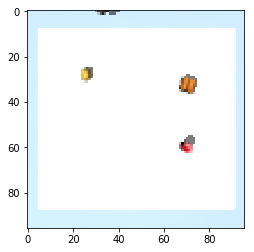

In [5]:
plt.imshow(i[0])

In [6]:
px, py = np.where(i[0].sum(axis=2) == 3)

In [7]:
px.min()

8

In [8]:
px.max()

86

In [9]:
py.min()

5

In [10]:
py.max()

90

In [14]:
i[0][48,4]

array([0.85490196, 0.95686275, 1.        ])

In [12]:
i[0][48,91]

array([0.93333333, 0.98431373, 1.        ])

In [23]:
im = Image.open('make_urdf/textures/table_v1.png')

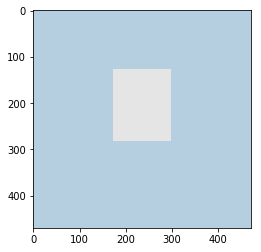

In [12]:
plt.imshow(im)

In [13]:
px, py, _ = np.where(np.array(im)==[229,229,229])

In [14]:
px.min()

127

In [15]:
px.max()

282

In [16]:
py.min()

173

In [17]:
py.max()

296

In [24]:
t = np.array(im)
t[112:300, 153:316] = [229, 229, 229]
im_new = Image.fromarray(t)
im_new.save('make_urdf/textures/table_test.png')

In [33]:
t = np.array(im)
t[127:282, 173:296] = [229, 229, 229]
im_new = Image.fromarray(t)
im_new.save('make_urdf/textures/table_t.png')

In [3]:
env.move_to_pos([0.35, 0.35, 1.05])

In [4]:
env.move_to_pos([0.45, 0.35, 1.05])

In [4]:
env.move_to_pos([-0.4, 0.4, 1.05])

In [15]:
env.move_to_pos([-0., -0.22, 1.05])

In [11]:
env.move_to_pos([-0.3, 0.4, 1.05])

In [3]:
_ = pe.reset()

In [14]:
pe.pos2pixel(-0.35, -0.22)

(93, 7)

In [15]:
pe.pixel2pos(40, 93)

(-0.3494926932522989, 0.0378679656448124, 0.9)

In [5]:
x = pe.reset()

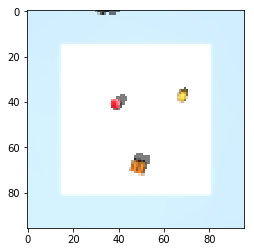

In [12]:
plt.imshow(x[0])

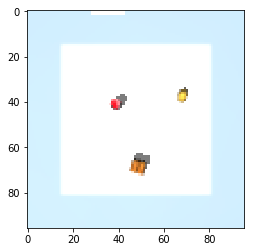

In [43]:
y = copy.deepcopy(x[0])
y[:2, 28:43] = [1, 1, 1]
plt.imshow(y)

TypeError: Invalid dimensions for image data

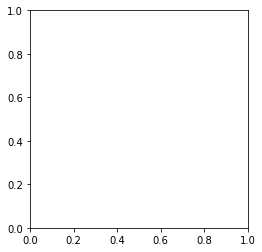

In [32]:
pe.move2pixel(0, 87)

TypeError: Invalid dimensions for image data

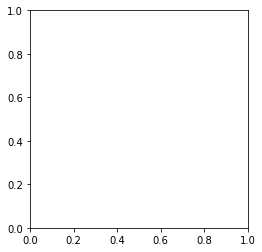

In [12]:
pe.move2pixel(100, 87)